In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

VERBOSE=False

In [2]:

poker_train_df = pd.read_csv('~/Desktop/CS7641/datasets/poker/poker-hand-training-true.data', sep=',')
poker_test_df = pd.read_csv('~/Desktop/CS7641/datasets/poker/poker-hand-testing.data', sep=',')

X_train = poker_train_df.values[:, :-1]
y_train = poker_train_df.values[:,-1]

X_test = poker_test_df.values[:, :-1]
y_test = poker_test_df.values[:,-1]

In [3]:
# DNN
dnn = MLPClassifier(hidden_layer_sizes=(12,), random_state=1, max_iter=10000, tol=0.0001, n_iter_no_change=10, verbose=VERBOSE)
dnn.fit(X_train, y_train)
print('\nPredict DNN:\n')
# print(dnn.predict(X_test))
print('Train data Score: ', dnn.score(X_train, y_train))
print('Test data Score', dnn.score(X_test, y_test))
plot_learning_curve(dnn, 'KNN Learning Curve', X_train, y_train, n_jobs=-1)


Iteration 1, loss = 7.50054452
Iteration 2, loss = 1.52904208
Iteration 3, loss = 1.13783255
Iteration 4, loss = 1.06607955
Iteration 5, loss = 1.03959848
Iteration 6, loss = 1.02558599
Iteration 7, loss = 1.01712203
Iteration 8, loss = 1.01185774
Iteration 9, loss = 1.00817404
Iteration 10, loss = 1.00553742
Iteration 11, loss = 1.00344071
Iteration 12, loss = 1.00147919
Iteration 13, loss = 0.99947431
Iteration 14, loss = 0.99809402
Iteration 15, loss = 0.99747309
Iteration 16, loss = 0.99643559
Iteration 17, loss = 0.99542846
Iteration 18, loss = 0.99414932
Iteration 19, loss = 0.99349752
Iteration 20, loss = 0.99153857
Iteration 21, loss = 0.99190547
Iteration 22, loss = 0.99092886
Iteration 23, loss = 0.99000050
Iteration 24, loss = 0.98978839
Iteration 25, loss = 0.98863583
Iteration 26, loss = 0.98838592
Iteration 27, loss = 0.98878794
Iteration 28, loss = 0.98662276
Iteration 29, loss = 0.98593881
Iteration 30, loss = 0.98577725
Iteration 31, loss = 0.98540387
Iteration 32, los

/home/tristani/jupyter_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Test data Score 0.5776445776445777


NameError: name 'plot_learning_curve' is not defined


Predict KNN:


<module 'matplotlib.pyplot' from '/home/tristani/jupyter_env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

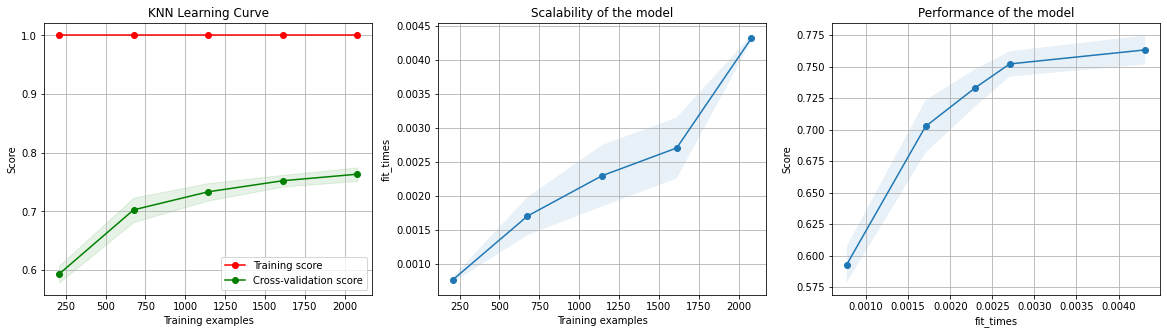

In [ ]:

# KNN
knn = KNeighborsClassifier(n_neighbors=30, leaf_size=10, weights='distance', n_jobs=-1)
print('\nPredict KNN:')
# knn.fit(X_train, y_train)
# print(knn.predict(X_test))
plot_learning_curve(knn, 'KNN Learning Curve', X_train, y_train, n_jobs=-1)
# print('Train data Score: ', knn.score(X_train, y_train))
# print('Test data Score', knn.score(X_test, y_test))



Decision Trees:
Train data Score:  0.762045663561118
Test data Score 0.5102115102115102


/home/tristani/jupyter_env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


<module 'matplotlib.pyplot' from '/home/tristani/jupyter_env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

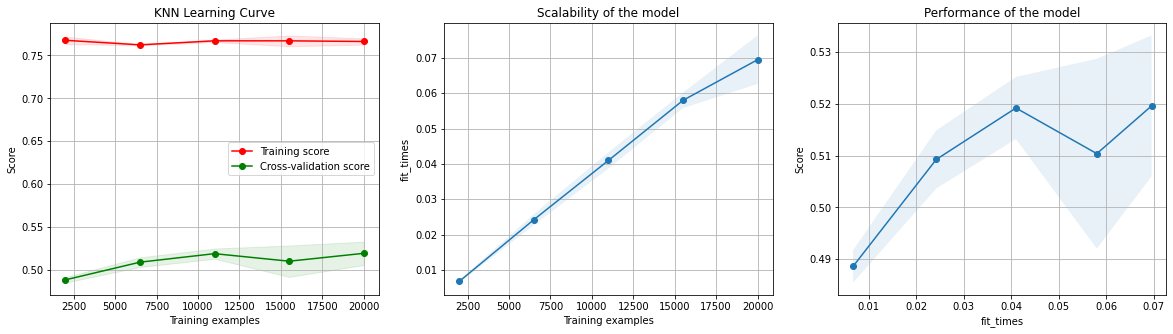

In [22]:
# DecisionTree
print('\nDecision Trees:')
tree = DecisionTreeClassifier(random_state=0, min_samples_leaf=5)
tree.fit(X_train, y_train)
# print(tree.predict(X_test))
print('Train data Score: ', tree.score(X_train, y_train))
print('Test data Score', tree.score(X_test, y_test))
plot_learning_curve(tree, 'KNN Learning Curve', X_train, y_train, n_jobs=-1)



Random Forests:
Train data Score:  0.7592866568035507
Test data Score 0.5978985978985979


/home/tristani/jupyter_env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


<module 'matplotlib.pyplot' from '/home/tristani/jupyter_env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

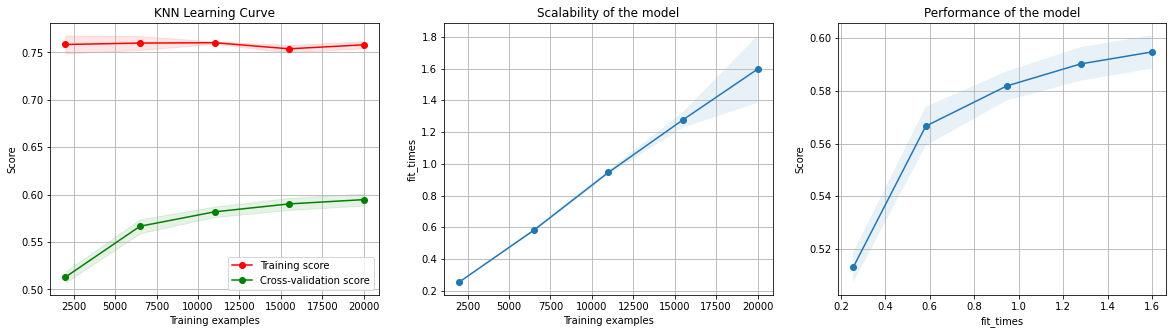

In [23]:
# Forest
print('\nRandom Forests:')
forest = RandomForestClassifier(random_state=0, min_samples_leaf=12)
forest.fit(X_train, y_train)
# print(forest.predict(X_test))
print('Train data Score: ', forest.score(X_train, y_train))
print('Test data Score', forest.score(X_test, y_test))
plot_learning_curve(forest, 'KNN Learning Curve', X_train, y_train, n_jobs=-1)




SVM:
Train data Score:  0.5781118797232996
Test data Score 0.5705785705785705


/home/tristani/jupyter_env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


<module 'matplotlib.pyplot' from '/home/tristani/jupyter_env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

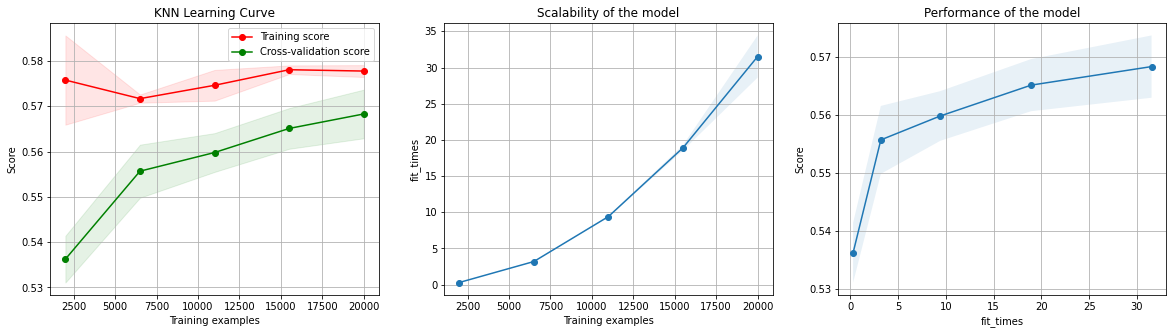

In [24]:
# SVM
print('\nSVM:')
svms = svm.SVC()
svms.fit(X_train, y_train)
# print(svms.predict(X_test))
print('Train data Score: ', svms.score(X_train, y_train))
print('Test data Score', svms.score(X_test, y_test))
plot_learning_curve(svms, 'KNN Learning Curve', X_train, y_train, n_jobs=-1)


In [25]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), fit_params=None):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,fit_params=fit_params,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt